In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_combined=pd.merge(ride_data,city_data, on="city",how="left")


# Display the data table for preview
data_combined.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

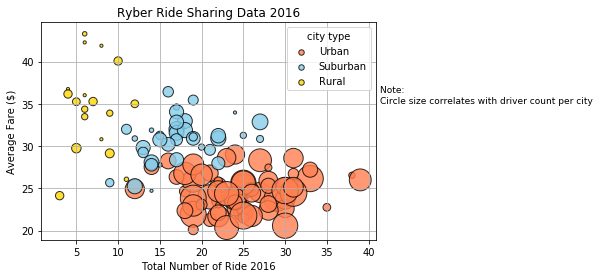

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban=data_combined.loc[data_combined["type"]=="Urban"]
suburban=data_combined.loc[data_combined["type"]=="Suburban"]
rural=data_combined.loc[data_combined["type"]=="Rural"]

urban_grouped=urban.groupby(["city"])
suburban_grouped=suburban.groupby(["city"])
rural_grouped=rural.groupby(["city"])


x_urban=urban_grouped["ride_id"].count()
y_urban=urban_grouped["fare"].mean()
driver_urban=urban_grouped["driver_count"].mean()

x_suburban=suburban_grouped["ride_id"].count()
y_suburban=suburban_grouped["fare"].mean()
driver_suburban=suburban_grouped["driver_count"].mean()

x_rural=rural_grouped["ride_id"].count()
y_rural=rural_grouped["fare"].mean()
driver_rural=rural_grouped["driver_count"].mean()


# Build the scatter plots for each city types
Urban=plt.scatter(x_urban, y_urban,s=driver_urban*10,facecolors="coral", alpha=0.8, edgecolors="black",label="Urban" )
Suburban=plt.scatter(x_suburban, y_suburban,s=driver_suburban*10,facecolors="skyblue", edgecolors="black",alpha=0.8,label="Suburban")
Rural=plt.scatter(x_rural, y_rural,s=driver_rural*10,facecolors="Gold", edgecolors="black",alpha=0.8,label="Rural")

# Incorporate the other graph properties
plt.title("Ryber Ride Sharing Data 2016")
plt.xlabel("Total Number of Ride 2016")
plt.ylabel("Average Fare ($)")

# Create a legend
leg=plt.legend(loc="upper right",title="city type")
leg.legendHandles[0]._sizes=[30]
leg.legendHandles[1]._sizes=[30]
leg.legendHandles[2]._sizes=[30]
plt.grid()

# Incorporate a text label regarding circle size
textstr="Note: \nCircle size correlates with driver count per city"
plt.gcf().text(0.91, 0.6, textstr, fontsize=9)


# Save Figure
plt.savefig("Images/bubblepolt.png")



In [7]:
# Show plot
plt.show()

## Total Fares by City Type

C:\Users\sarah\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


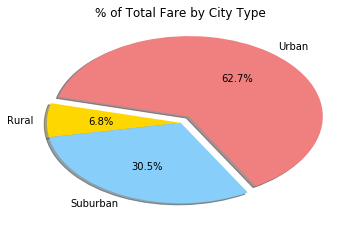

In [8]:
# Calculate Type Percents
fare_total = data_combined["fare"].sum()
fare_urban_percent=urban["fare"].sum()/fare_total
fare_suburban_percent=suburban["fare"].sum()/fare_total
fare_rural_percent=rural["fare"].sum()/fare_total

labels=["Urban","Rural","Suburban"]
sizes=[fare_urban_percent,fare_rural_percent,fare_suburban_percent]
colors=["lightcoral","gold","lightskyblue"]
explode = (0.1, 0, 0)
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Fare by City Type")
plt.axes().set_aspect(0.6)
# Save Figure
plt.savefig("Images/totalfares.png")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

C:\Users\sarah\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


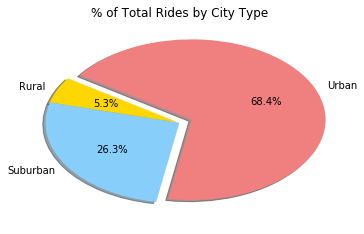

In [10]:
# Calculate Ride Percents
ride_id_total = data_combined["ride_id"].count()
ride_id_urban_percent=urban["ride_id"].count()/ride_id_total
ride_id_suburban_percent=suburban["ride_id"].count()/ride_id_total
ride_id_rural_percent=rural["ride_id"].count()/ride_id_total

labels=["Urban","Rural","Suburban"]
sizes=[ride_id_urban_percent,ride_id_rural_percent,ride_id_suburban_percent]
colors=["lightcoral","gold","lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
plt.axes().set_aspect(0.6)
# Save Figure
plt.savefig("Images/totalrides.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

C:\Users\sarah\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


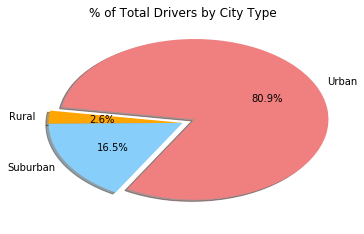

In [12]:
# Calculate Driver Percents
driver_total = city_data["driver_count"].sum()
driver_grouped=city_data.groupby("type")
driver_percent=driver_grouped["driver_count"].sum()/driver_total


# Build Pie Charts
labels=["Urban","Rural","Suburban"]
sizes=[driver_percent[2],driver_percent[0],driver_percent[1]]
colors=["lightcoral","orange","lightskyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")

plt.axes().set_aspect(0.6)
# Save Figure
plt.savefig("Images/totaldrives.png")

In [13]:
# Show Figure
plt.show()

In [14]:
# [observable trends]
# 1.The number of drivers, rides and fare have strong positive association.
# 2.The nuber of rides and the average fare have negative assiciation. Ex, urban has more rides but lower average fare.
    #I speculate that the reason caused lower average fare is the short distance for each ride, which means urban tends to have shorter distant rides.
# 3. The proporation of "total fare" and "total rides" based on city type are approximately the same, I speculate that the fare per mile of three city types are about the same.